In [1]:
import time

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
# import logging
import elfi
from elfi.examples import ma2, mg1, daycare
# from elfi.examples.toad import toad
from elfi.methods.bsl.select_penalty import select_penalty

from elfi.methods.bsl.estimate_whitening_matrix import \
    estimate_whitening_matrix



In [3]:
toad = np.load("logposterior_toad.npy")

In [9]:
len(np.unique(toad))

46

## Build MA(2) SL Model

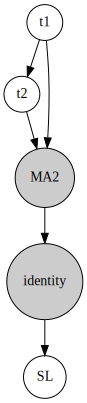

In [4]:
# np.random.seed(234)
m = ma2.get_model(n_obs=50, seed_obs=99)

# def identity(x, delta=1.0, eps=0.0):
#     return np.sinh((np.arcsinh(x) + eps)/delta)

def identity(x):
    return x

# remove nodes from default ABC model
m.remove_node('S1')
m.remove_node('S2')
m.remove_node('d')

elfi.Summary(identity, m['MA2'], name="identity")
# standard (and minimal) SL node
elfi.SyntheticLikelihood("bsl", m['identity'], name="SL")
elfi.draw(m)

In [ ]:
elfi.Summary(identity, m['MA2'], name="identity")

In [ ]:
# standard BSL
elfi.SyntheticLikelihood("bsl", m['identity'], name="SL")

# semiBSL
elfi.SyntheticLikelihood("semiBsl", m['identity'], name="semiSL")

# R-BSL
elfi.SyntheticLikelihood("rBSL", m['identity'], type_misspec="mean", name="rSL")

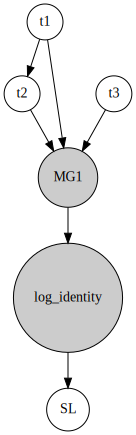

In [12]:
# m_mg1 = mg1.get_model()
# elfi.draw(m_mg1)

 /Users/ryankelly/python_projects/elfi/elfi/examples/daycare.py:136: FutureWarning:Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


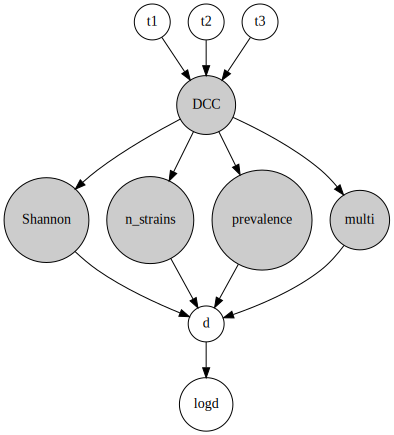

In [13]:
# m_day = daycare.get_model()
# elfi.draw(m_day)

In [10]:
# # minimum effort sample
# batch_size = 500  # number simulations each iterations
# elfi.BSL(m['SL'], batch_size=batch_size).sample(1000, sigma_proposals=np.eye(2))

Progress [==================================================] 100.0% Complete


Method: BSL
Number of samples: 1000
Method: BSL
Number of samples: 1000
Number of simulations: 500000
MCMC Acceptance Rate: 0.188
Sample means: t1: 0.653, t2: 0.275

In [5]:
batch_size = 500  # number simulations each iterations

# create bsl sampler object
bsl_obj = elfi.BSL(
                m['SL'],  # target node of inference
                batch_size=batch_size,  
                seed=1 
                )

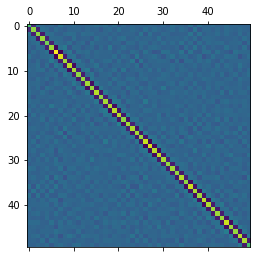

In [31]:
bsl_obj.plot_correlation_matrix(true_params, batch_size=10000, precision=True)

Progress [==================================================] 100.0% Complete


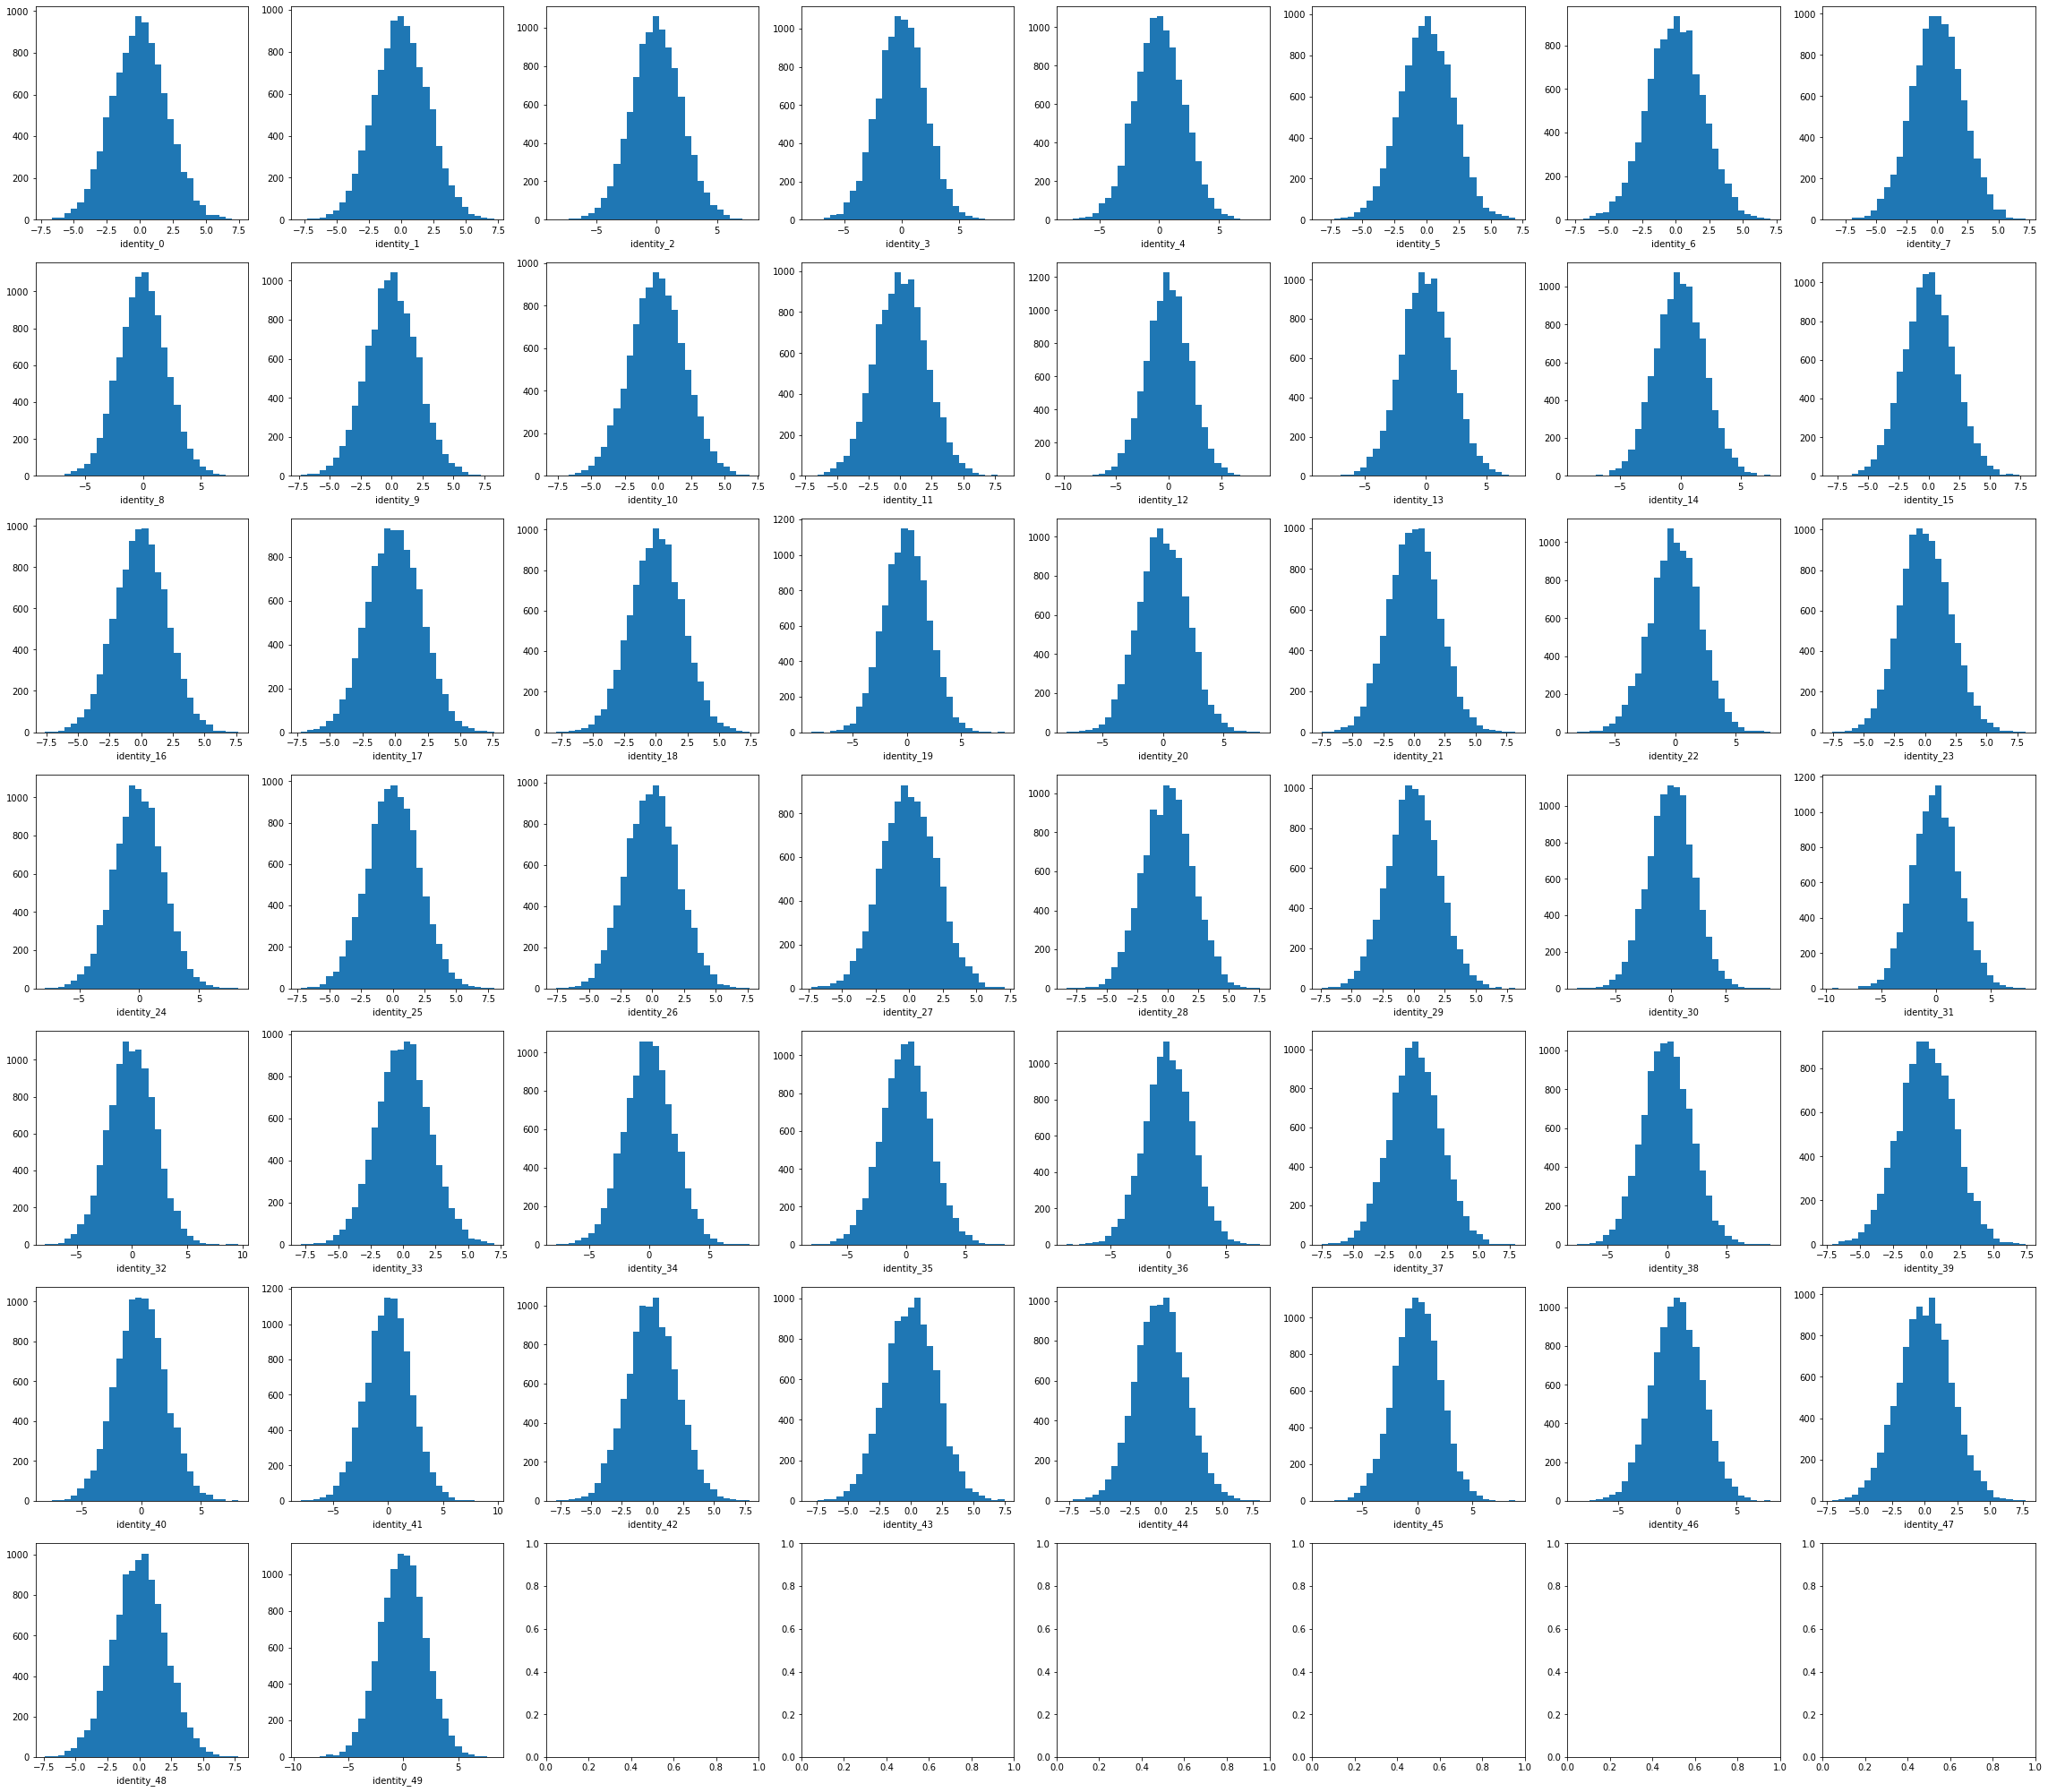

In [18]:
_ = bsl_obj.plot_summary_statistics(batch_size=10000, theta_point=true_params)

In [6]:
# sample using sBSL
mcmc_iterations = 200000
true_params = np.array([0.6, 0.2])
est_post_cov =np.array([[0.02, 0.01], [0.01, 0.02]])
burn_in = 0

bsl_res = bsl_obj.sample(
    mcmc_iterations,  # num samples - required
    params0=true_params, # starting value of MCMC chain - optional
    sigma_proposals=est_post_cov, # proposal cov for random walk - required
    burn_in=burn_in  # burn_in - optional
)

Progress [==================================================] 100.0% Complete


In [33]:
print(bsl_res)
bsl_res.outputs

Method: BSL
Number of samples: 4500
Method: BSL
Number of samples: 4500
Number of simulations: 2500000
MCMC Acceptance Rate: 0
Sample means: t1: 0, t2: 0



{'t1': array([0., 0., 0., ..., 0., 0., 0.]),
 't2': array([0., 0., 0., ..., 0., 0., 0.]),
 'SL': array([[-69.24750031],
        [-69.24750031],
        [-69.24750031],
        ...,
        [-69.24750031],
        [-69.24750031],
        [-69.24750031]])}

array([[<AxesSubplot:ylabel='t1'>],
       [<AxesSubplot:xlabel='Iterations in Chain 0', ylabel='t2'>]],
      dtype=object)

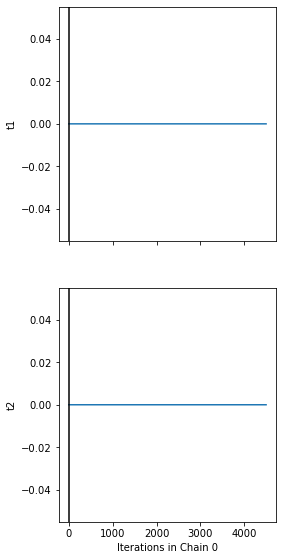

In [34]:
bsl_res.plot_traces()

array([<AxesSubplot:xlabel='t1'>, <AxesSubplot:xlabel='t2'>], dtype=object)

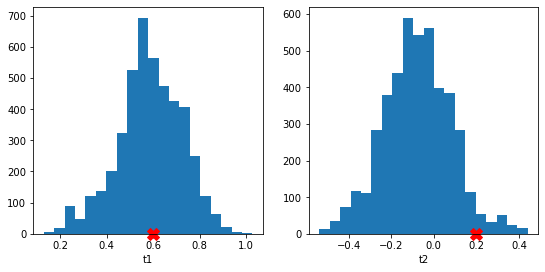

In [22]:
reference_value = {'t1': 0.6, 't2': 0.2}
bsl_res.plot_marginals(reference_value=reference_value)

array([[<AxesSubplot:ylabel='t1'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='t1', ylabel='t2'>,
        <AxesSubplot:xlabel='t2'>]], dtype=object)

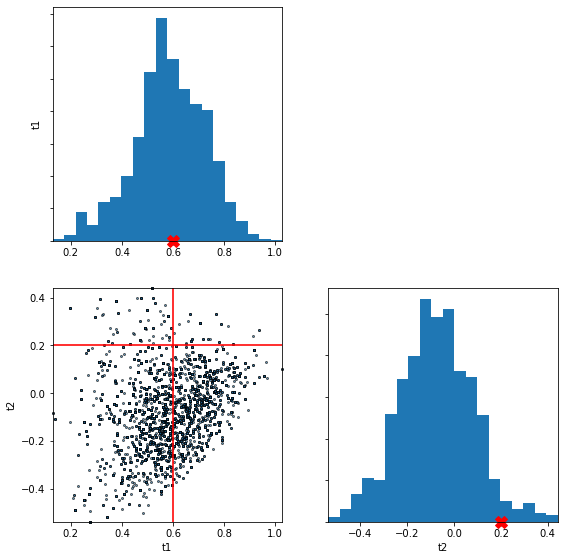

In [23]:
bsl_res.plot_pairs(reference_value=reference_value)

## semiBSL MA(2) Example

In [37]:
m = ma2.get_model(n_obs=50, seed_obs=12)

def identity(x):
    return x

# remove nodes from default ABC model
m.remove_node('S1')
m.remove_node('S2')
m.remove_node('d')

elfi.Summary(identity, m['MA2'], name="identity")

elfi.SyntheticLikelihood("semibsl", m['identity'], name="SL")  # only diff to bsl is "semibsl"



SyntheticLikelihood(name='SL')

In [38]:
# pool = elfi.OutputPool(['t1', 't2', 'identity', 'SL'])
batch_size = 500
bsl_obj = elfi.BSL(
                m['SL'],  # target node of inference
#                 output_names=['identity'],  # example to show how save acc. samples (to bsl_res from sampling)
                batch_size=batch_size, 
#                 pool=pool,  # way to save all computed samples
                seed=8 
                )


Progress [==================================================] 100.0% Complete


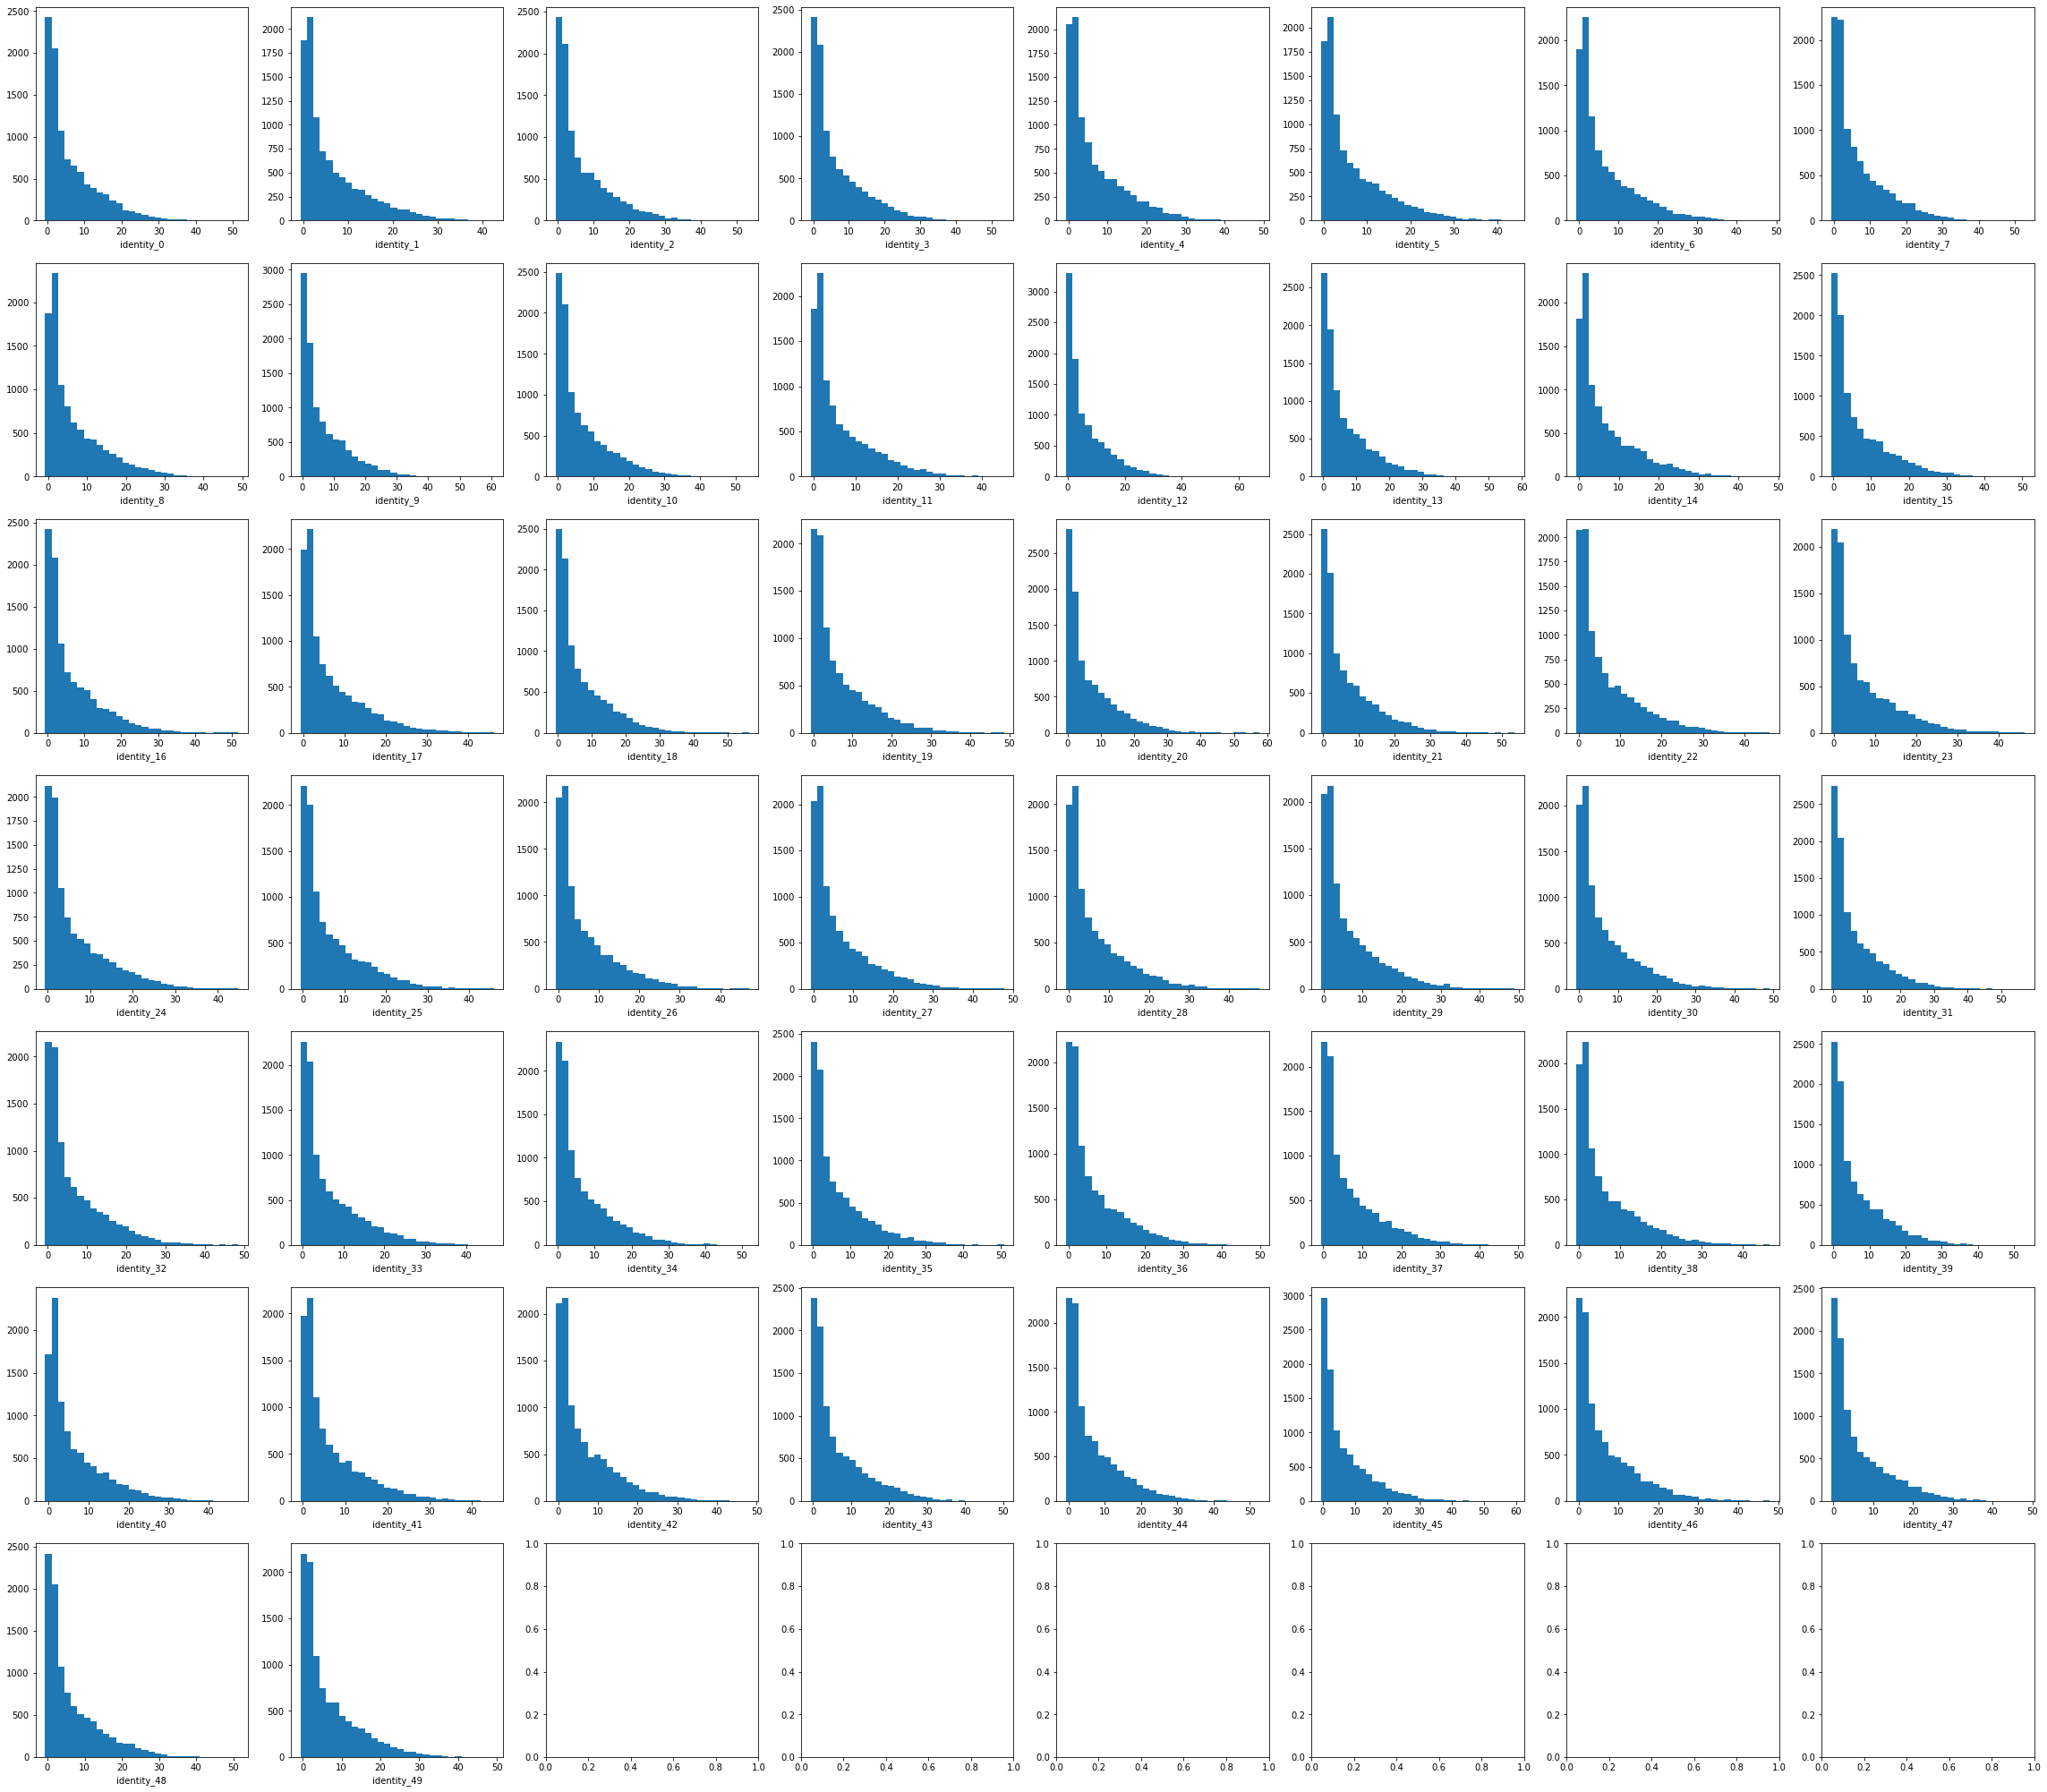

In [9]:
true_params = np.array([.6, .2])
_ = bsl_obj.plot_summary_statistics(batch_size=10000, theta_point=true_params)

In [39]:
mcmc_iterations = 20000
true_params = np.array([.6, .2])
bsl_res = bsl_obj.sample(
                    mcmc_iterations,
                    sigma_proposals=np.array([[0.02, 0.01],
                                              [0.01, 0.02]]),
                    params0=true_params,
                    burn_in=0
                )

Progress [==================================================] 100.0% Complete


In [27]:
# # Quick show pool
import os
import pickle

pool.save()
output_files = os.listdir(pool.path)
output_res = {}
for output_file in output_files[1:]:
    with open(pool.path + '/' + output_file, 'rb') as pickleFile:
        res = pickle.load(pickleFile)
        output_res[output_file[:-4]] = res

In [36]:
# np.var([val for val in output_res['SL'].values()])

array(9.82693806)

In [38]:
# bsl_res.outputs

Method: BSL
Number of samples: 20000
Method: BSL
Number of samples: 20000
Number of simulations: 10000000
MCMC Acceptance Rate: 0.055
Sample means: t1: 0.828, t2: 0.546

ESS:  {'t1': 32.36321404195284, 't2': 14.014593416376348}


array([[<AxesSubplot:ylabel='t1'>],
       [<AxesSubplot:xlabel='Iterations in Chain 0', ylabel='t2'>]],
      dtype=object)

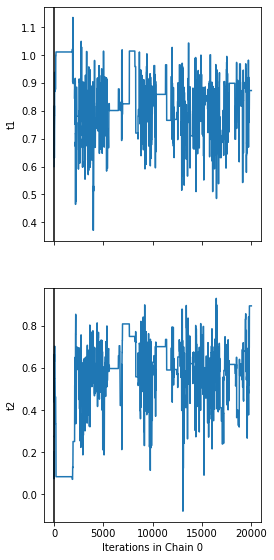

In [40]:
print(bsl_res)
print("ESS: ", bsl_res.compute_ess())
bsl_res.plot_traces()

array([<AxesSubplot:xlabel='t1'>, <AxesSubplot:xlabel='t2'>], dtype=object)

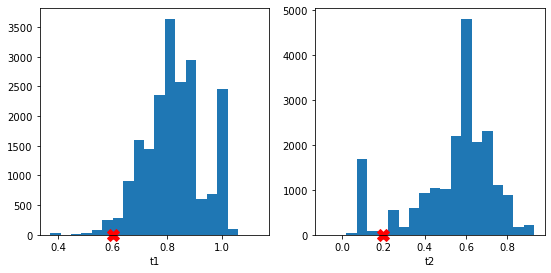

In [41]:
reference_value = {'t1': 0.6, 't2': 0.2}
bsl_res.plot_marginals(reference_value=reference_value)

array([[<AxesSubplot:ylabel='t1'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='t1', ylabel='t2'>,
        <AxesSubplot:xlabel='t2'>]], dtype=object)

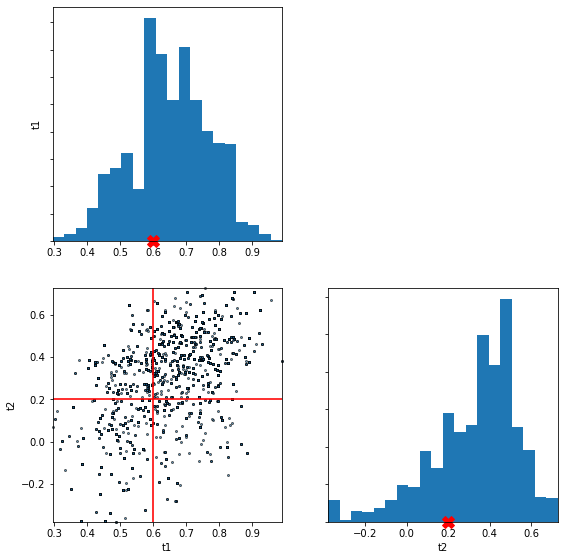

In [13]:
bsl_res.plot_pairs(reference_value=reference_value)

## wBSL

In [29]:
# np.random.seed(234)
m = ma2.get_model(n_obs=50, seed_obs=99)

def identity(x):
    return x

# remove nodes from default ABC model
m.remove_node('S1')
m.remove_node('S2')
m.remove_node('d')

elfi.Summary(identity, m['MA2'], name="identity")
elfi.SyntheticLikelihood("bsl", m['identity'], name="SL")
# elfi.draw(m['SL'])

SyntheticLikelihood(name='SL')

In [30]:
W = estimate_whitening_matrix(m, true_params,
                              batch_size=20000, discrepancy_name="SL")
m['SL'].become(elfi.SyntheticLikelihood("bsl", m['identity'], whitening=W,
                                        shrinkage="warton"))
batch_size = 80
# penalty = select_penalty(batch_size=batch_size,
#                          M=30,
#                          sigma=1.5,
#                          theta=[0.6, 0.2],
#                          model=m,
# #                          lmdas=[0.12245643],
#                          discrepancy_name='SL',
#                          verbose=True
#                          )
m['SL'].become(elfi.SyntheticLikelihood("bsl", m['identity'], whitening=W,
                                        shrinkage="warton", penalty=0.125))


In [27]:
penalty

array([0.12245643])

In [42]:
true_params = np.array([.6, .2])
W = estimate_whitening_matrix(m, true_params,
                              batch_size=20000, discrepancy_name="SL")

m['SL'].become(elfi.SyntheticLikelihood("bsl", m['identity'], whitening=W,
                                        shrinkage="warton"))

# batch_size = [1000, 2000]

# penalty = select_penalty(batch_size=batch_size,
#                          M=30,
#                          sigma=1.5,
#                          theta=[0.6, 0.2],
#                          model=m,
#                          discrepancy_name='SL',
#                          verbose=True
#                          )

# set to 0.35 n = 1000 for a Priddle comparison

m['SL'].become(elfi.SyntheticLikelihood("bsl", m['identity'], whitening=W,
               shrinkage="warton", penalty=0.35))


In [31]:
batch_size = 1000
bsl_obj = elfi.BSL(
                m['SL'],  # target node of inference
#                 output_names=['identity'],  # example to show how save acc. samples (to bsl_res from sampling)
                batch_size=batch_size, 
#                 pool=pool,  # way to save all computed samples
                seed=1 
                )

In [32]:
mcmc_iterations = 2000
true_params = np.array([.6, .2])
bsl_res = bsl_obj.sample(
                    mcmc_iterations,
                    sigma_proposals=np.array([[0.02, 0.01],
                                              [0.01, 0.02]]),
                    params0=true_params,
                    burn_in=200
                )

Progress [==================================================] 100.0% Complete


Method: BSL
Number of samples: 1800
Method: BSL
Number of samples: 1800
Number of simulations: 2000000
MCMC Acceptance Rate: 0.651
Sample means: t1: 0.601, t2: -0.0162

ESS:  {'t1': 159.1216153696951, 't2': 62.191742865917355}


array([[<AxesSubplot:ylabel='t1'>],
       [<AxesSubplot:xlabel='Iterations in Chain 0', ylabel='t2'>]],
      dtype=object)

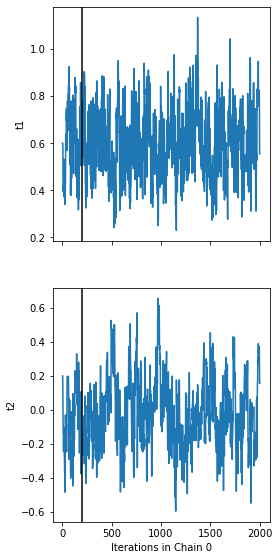

In [33]:
print(bsl_res)
print("ESS: ", bsl_res.compute_ess())
bsl_res.plot_traces()

array([<AxesSubplot:xlabel='t1'>, <AxesSubplot:xlabel='t2'>], dtype=object)

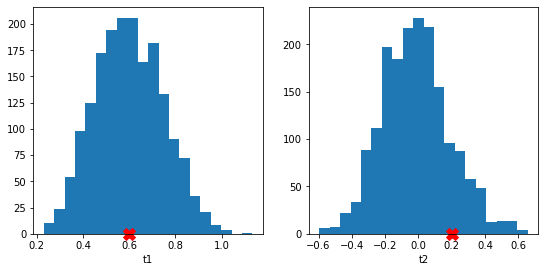

In [34]:
reference_value = {'t1': 0.6, 't2': 0.2}
bsl_res.plot_marginals(reference_value=reference_value)

array([[<AxesSubplot:ylabel='t1'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='t1', ylabel='t2'>,
        <AxesSubplot:xlabel='t2'>]], dtype=object)

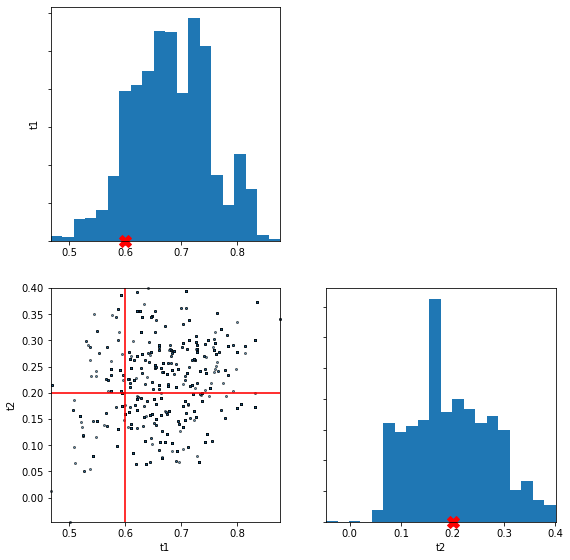

In [9]:
bsl_res.plot_pairs(reference_value=reference_value)

## Misspecified BSL

In [5]:
from elfi.examples import misspecified_ma1


array([0.00909528])

## M/G/1

In [21]:
m_mg1 = mg1.get_model(seed_obs=1)
batch_size = 1000
true_params = np.array([1., 5., 0.2])

approx_est_cov = np.array([[ 0.01154655, -0.00107713, -0.00173222],
                        [-0.00107713,  0.03442745,  0.00058584],
                        [-0.00173222,  0.00058584,  0.01856123]])
mcmc_iterations = 5000
bsl_res = elfi.BSL(
    m_mg1['SL'],
    batch_size=batch_size,
    seed=123
).sample(
    mcmc_iterations,
    sigma_proposals=approx_est_cov,
    params0=true_params,
    burn_in=500
)

Progress [==================================================] 100.0% Complete


In [22]:
print(bsl_res)

Method: BSL
Number of samples: 4500
Method: BSL
Number of samples: 4500
Number of simulations: 5000000
MCMC Acceptance Rate: 0.114
Sample means: t1: 0.62, t2: 4.98, t3: 0.131



array([[<AxesSubplot:ylabel='t1'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='t2'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='t1', ylabel='t3'>,
        <AxesSubplot:xlabel='t2'>, <AxesSubplot:xlabel='t3'>]],
      dtype=object)

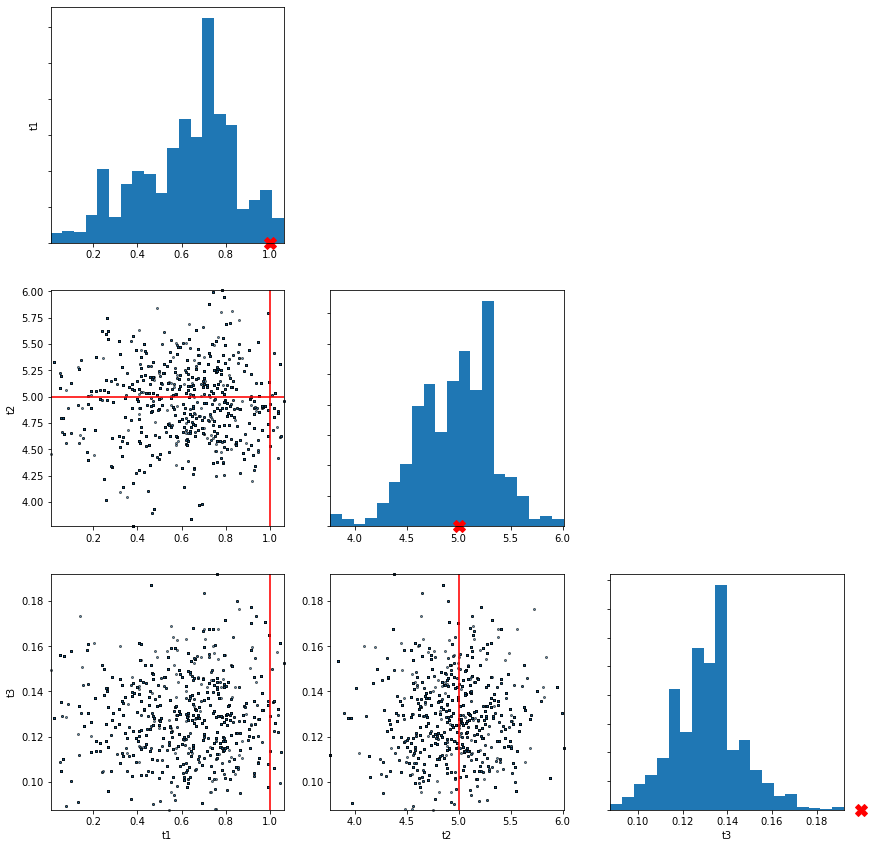

In [27]:
reference_value = {'t1': 1.0, 't2': 5.0, 't3': 0.2}
bsl_res.plot_pairs(reference_value=reference_value)

In [ ]:
# import scipy.stats as ss
# test crazy model
# m = elfi.ElfiModel()

# def mvn_sim(*args, n_obs=50, batch_size=500, **kwargs):
#     mean = np.atleast_2d([*args])
#     return np.random.multivariate_normal(mean, cov=np.eye(len(mean)))

# prior_num = 20
# priors = []
# for i in range(prior_num):
#     prior_name = "prior_" + str(i)
#     prior = elfi.Prior('normal', 0, 1, model=m, name=prior_name)
#     priors.append(prior)
# elfi.draw(m)
# elfi.Simulator(mvn_sim, *priors, name="mvn")
# elfi.Summary()
